In [11]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

from IPython.display import display, Math, Latex

import pandas
import numpy as np

# Exercice 7
> From Roland Donnat

L'objectif de cet exercice est d'utiliser un RB afin de prédire le résultat de matchs de football de Ligue 1 (division 1 de football en France) à partir de certaines statistiques de jeu.

Deux jeux de données vont être utilisés :

+ Un jeu de données d'apprentissage permettant de calibrer le modèle prédictif contanant l'historique des matchs des saisons 2005-2006 à 2009-2010 - Fichier fra_l1_app.csv
+ Un jeu de données de test permettant d'évaluer le modèle contanant les matchs des saisons 2010-2011 et 2011-201 - Fichier fra_l1_test.csv



### Prétraitement des données

Pour un apprentissage "facile", nous allons :
+ transformer toutes les données en entier ou chaîne, 
+ s'assurer que la base de tests ne possèdent pas de valeurs inconnues pour la base d'apprentissage
+ sélectionner les variables "HomeTeam","AwayTeam","HST","AST" qui nous serviront à tenter de prédire "FTR" 
+ créer les fichiers "learn.csv" et "test.csv" épurés.

In [12]:
# data file is in the ../resources folder

datas=pandas.read_csv("fra_l1_app.csv")
tests=pandas.read_csv("fra_l1_test.csv")

In [13]:
datas.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HY,AY,HR,AR
0,2005-07-29,Paris SG,Metz,4,1,H,2,0,H,16.0,11.0,9.0,7.0,2,3,0,0
1,2005-07-30,Marseille,Bordeaux,0,2,A,0,1,A,7.0,9.0,3.0,4.0,2,4,1,0
2,2005-07-30,Nancy,Monaco,0,1,A,0,0,D,10.0,5.0,6.0,3.0,2,2,2,0
3,2005-07-30,Nantes,Lens,2,0,H,2,0,H,10.0,10.0,3.0,3.0,1,3,0,0
4,2005-07-30,Nice,Troyes,1,1,D,1,0,H,13.0,5.0,6.0,5.0,2,2,0,1


In [14]:
tests.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HY,AY,HR,AR
0,2010-08-07,Lyon,Monaco,0,0,D,0,0,D,16.0,9.0,5.0,4.0,2,3,0,0
1,2010-08-07,Marseille,Caen,1,2,A,0,0,D,16.0,12.0,3.0,2.0,2,3,0,0
2,2010-08-07,Nice,Valenciennes,0,0,D,0,0,D,10.0,11.0,2.0,1.0,0,3,0,0
3,2010-08-07,Paris SG,St Etienne,3,1,H,2,1,H,19.0,14.0,6.0,5.0,2,1,0,0
4,2010-08-07,Rennes,Lille,1,1,D,1,0,H,20.0,14.0,5.0,5.0,3,3,0,0


### Prétraitement

L'apprentissage avec pyAgrum fonctionne sur des csv totalement prétraités (des entiers). Il s'agit donc de préparer la base en ce sens.

In [15]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1899 non-null   object 
 1   HomeTeam  1899 non-null   object 
 2   AwayTeam  1899 non-null   object 
 3   FTHG      1899 non-null   int64  
 4   FTAG      1899 non-null   int64  
 5   FTR       1899 non-null   object 
 6   HTHG      1899 non-null   int64  
 7   HTAG      1899 non-null   int64  
 8   HTR       1899 non-null   object 
 9   HS        1899 non-null   float64
 10  AS        1899 non-null   float64
 11  HST       1899 non-null   float64
 12  AST       1899 non-null   float64
 13  HY        1899 non-null   int64  
 14  AY        1899 non-null   int64  
 15  HR        1899 non-null   int64  
 16  AR        1899 non-null   int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 252.3+ KB


In [16]:
#pretraitement

# float en int
datas["HS"] = datas["HS"].astype(int)
datas["AS"] = datas["AS"].astype(int)
tests["HS"] = tests["HS"].astype(int)
tests["AS"] = tests["AS"].astype(int)
datas["HST"] = datas["HST"].astype(int)
datas["AST"] = datas["AST"].astype(int)
tests["HST"] = tests["HST"].astype(int)
tests["AST"] = tests["AST"].astype(int)
    
# s'assurer que les valeurs de tests sont incluses dans les valeurs d'apprentissage
HST_app_max = np.max(datas["HST"])
AST_app_max = np.max(datas["AST"])
tests.loc[tests["HST"] > HST_app_max, "HST"] = HST_app_max
tests.loc[tests["AST"] > AST_app_max, "AST"] = AST_app_max

# ville -> entiers
towns = datas['HomeTeam'].unique()
towns2nums = dict(zip(towns,range(len(towns))))
nums2towns = dict(zip(range(len(towns)),towns))
datas['HomeTeamNum']=datas['HomeTeam'].replace(towns2nums)
datas['AwayTeamNum']=datas['AwayTeam'].replace(towns2nums)
tests['HomeTeamNum']=tests['HomeTeam'].replace(towns2nums)
tests['AwayTeamNum']=tests['AwayTeam'].replace(towns2nums)

# classe -> entiers
classes=datas['FTR'].unique()
classes2nums=dict(zip(classes,range(len(classes))))
datas['FTRNum']=datas['FTR'].replace(classes2nums)
tests['FTRNum']=tests['FTR'].replace(classes2nums)

datas.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HY,AY,HR,AR,HomeTeamNum,AwayTeamNum,FTRNum
0,2005-07-29,Paris SG,Metz,4,1,H,2,0,H,16,11,9,7,2,3,0,0,0,16,0
1,2005-07-30,Marseille,Bordeaux,0,2,A,0,1,A,7,9,3,4,2,4,1,0,1,14,1
2,2005-07-30,Nancy,Monaco,0,1,A,0,0,D,10,5,6,3,2,2,2,0,2,11,1
3,2005-07-30,Nantes,Lens,2,0,H,2,0,H,10,10,3,3,1,3,0,0,3,13,0
4,2005-07-30,Nice,Troyes,1,1,D,1,0,H,13,5,6,5,2,2,0,1,4,12,2


In [17]:
tests.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HY,AY,HR,AR,HomeTeamNum,AwayTeamNum,FTRNum
0,2010-08-07,Lyon,Monaco,0,0,D,0,0,D,16,9,5,4,2,3,0,0,17,11,2
1,2010-08-07,Marseille,Caen,1,2,A,0,0,D,16,12,3,2,2,3,0,0,1,23,1
2,2010-08-07,Nice,Valenciennes,0,0,D,0,0,D,10,11,2,1,0,3,0,0,4,21,2
3,2010-08-07,Paris SG,St Etienne,3,1,H,2,1,H,19,14,6,5,2,1,0,0,0,6,0
4,2010-08-07,Rennes,Lille,1,1,D,1,0,H,20,14,5,5,3,3,0,0,18,8,2


Dans un second temps, nous décidons de nous limiter aux variables sivantes :
+ features : "HomeTeamNum","AwayTeamNum","HST","AST"
+ classe : "FTRNum"

In [18]:
#variables selection
vars=["HomeTeamNum","AwayTeamNum","HST","AST","FTRNum"]

#sauvegarde des bases opérationnelles 
datas[vars].to_csv("learn.csv",index=False)
tests[vars].to_csv("test.csv",index=False)


## Modèle "Naive Bayes"
Nous essayons tout d'abord un modèle "Naïve Bayes" qui est connu pour ne pas être correct du tout théoriquement mais, finalement, pour assez bien fonctionner. Le principe du modèle est de supposer une structure du modèle où la variable à expliquer (la classe) est l'unique parents des variables explicantes (les features).

HomeTeamNum:Labelized({0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27})
AwayTeamNum:Labelized({0|1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|26|27})
HST:Labelized({0|1|2|3|4|5|6|7|8|9|10|11|12|13|14})
AST:Labelized({0|1|2|3|4|5|6|7|8|9|10|11|12})
FTRNum:Labelized({0|1|2})


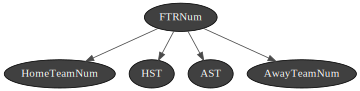

In [19]:
naive=gum.BayesNet("Ligue 1")

def series_to_lv(series):
    # Crée une LabelizedVariable pour une colonne de dataframe
    labels = series.unique()
    labels.sort()
    lv = gum.LabelizedVariable(series.name, "", len(labels))
    if series.dtype == "O":
        for i in range(len(labels)):
            v.changeLabel(i,labels[i])  
    print(lv)
    return lv

for va_name in vars:
  va = series_to_lv(datas[va_name])
  naive.add(va)
    
for va_name in vars[:-1]:
    naive.addArc(naive.idFromName(vars[-1]),naive.idFromName(va_name))
    
gnb.showBN(naive)

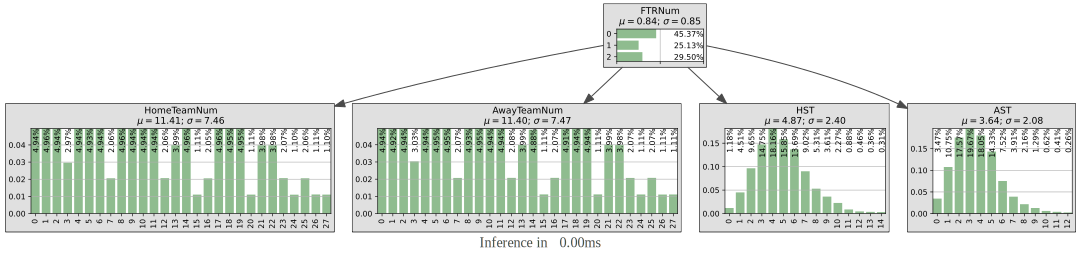

In [30]:
learner=gum.BNLearner("learn.csv")
learner.useScoreBIC()
learner.useSmoothingPrior(1)
naive=learner.learnParameters(naive.dag())

gnb.showInference(naive, size="13!")

In [31]:
print(nums2towns)

{0: 'Paris SG', 1: 'Marseille', 2: 'Nancy', 3: 'Nantes', 4: 'Nice', 5: 'Sochaux', 6: 'St Etienne', 7: 'Strasbourg', 8: 'Lille', 9: 'Le Mans', 10: 'Toulouse', 11: 'Monaco', 12: 'Troyes', 13: 'Lens', 14: 'Bordeaux', 15: 'Ajaccio', 16: 'Metz', 17: 'Lyon', 18: 'Rennes', 19: 'Auxerre', 20: 'Sedan', 21: 'Valenciennes', 22: 'Lorient', 23: 'Caen', 24: 'Le Havre', 25: 'Grenoble', 26: 'Montpellier', 27: 'Boulogne'}


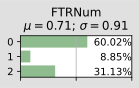

In [32]:
import matplotlib
%matplotlib inline
gnb.showPosterior(naive,target='FTRNum',evs={'HomeTeamNum':8,'AwayTeamNum':23})

test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████|


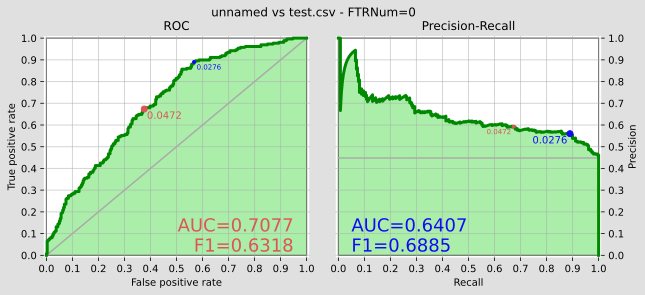

(0.707677224918605, 0.04721486055, 0.6406751168088342, 0.02763015085)

In [38]:
import pyAgrum.lib.bn2roc as bn2roc

bn2roc.showROC_PR(naive,"test.csv",target="FTRNum",label="0")

test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████|


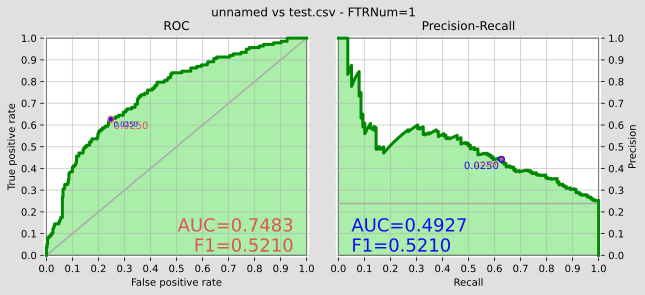

(0.7482789855072457, 0.0250199163, 0.492655918307973, 0.0250199163)

In [48]:
bn2roc.showROC_PR(naive,"test.csv",target="FTRNum",label="1")


test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████|


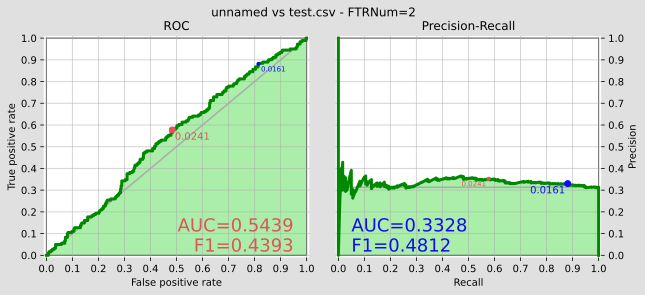

(0.5438648983397579, 0.0240754437, 0.3327776969802141, 0.0161218859)

In [40]:
bn2roc.showROC_PR(naive,"test.csv",target="FTRNum",label="2")

## Apprentissage 

Un apprentissage de structure peut-il donner mieux pour notre problème ?

### TabuList

Learned in 0.0023867s


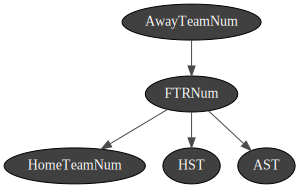

In [50]:
learner=gum.BNLearner("learn.csv")
learner.useLocalSearchWithTabuList()
learner.useScoreAIC()
learner.useNoPrior()
model_tabu=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
gnb.showBN(model_tabu)

test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████|


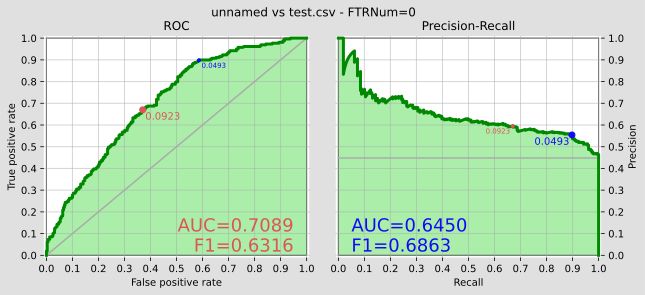

(0.708863364035778,
 0.09230837689999999,
 0.6449900768734682,
 0.049293857600000004)

In [51]:
bn2roc.showROC_PR(model_tabu,"test.csv",target="FTRNum",label="0")

### GHC

Learned in 0.0019904s


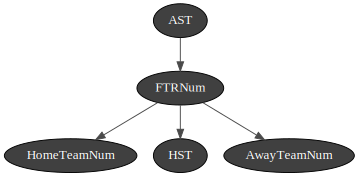

In [52]:
learner=gum.BNLearner("learn.csv")
learner.useGreedyHillClimbing()
learner.useScoreAIC()
learner.useNoPrior()
model_ghc=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
gnb.showBN(model_ghc)

test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████|


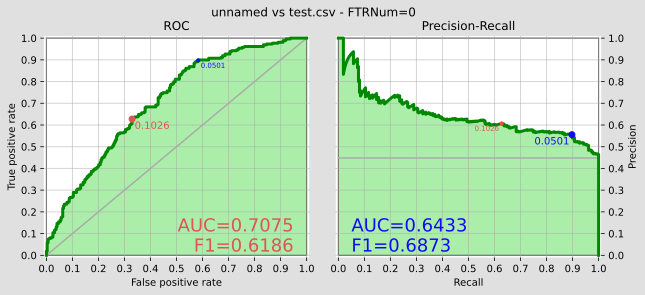

(0.7075319833940529, 0.1026465043, 0.6432643128563866, 0.05006617)

In [53]:
bn2roc.showROC_PR(model_ghc,"test.csv",target="FTRNum",label="0")

### MIIC

Learned in 0.0013236s


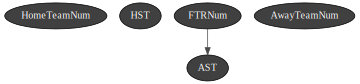

In [54]:
learner=gum.BNLearner("learn.csv")
learner.useMIIC()
learner.useSmoothingPrior()
model_miic=learner.learnBN()
print("Learned in {0}s".format(learner.currentTime()))
gnb.showBN(model_miic)

test.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████|


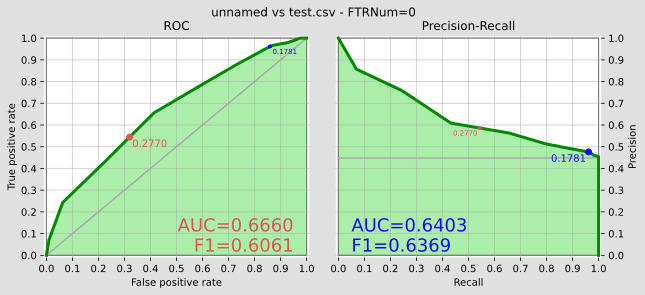

(0.6660231660231659, 0.27699045195, 0.6403113754384555, 0.17806069215)

In [55]:
bn2roc.showROC_PR(model_miic,"test.csv",target="FTRNum",label="0")